In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
%matplotlib inline

In [2]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,
columns=boston.feature_names)
targets = boston.target

/var/www/html/www/python/ai/venv10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [4]:
columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

In [5]:
df = pd.DataFrame(data,columns=columns)

In [6]:
df['MEDV'] = target

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='Count'>

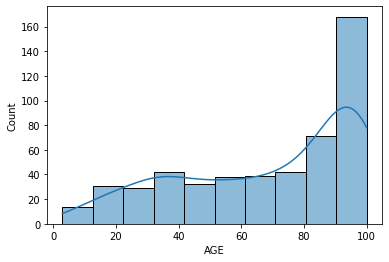

In [11]:
sns.histplot(data=df,x='AGE',kde=True)

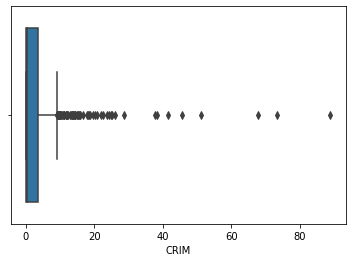

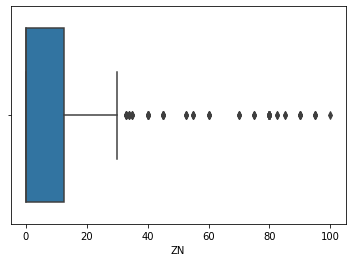

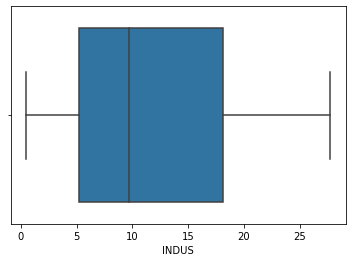

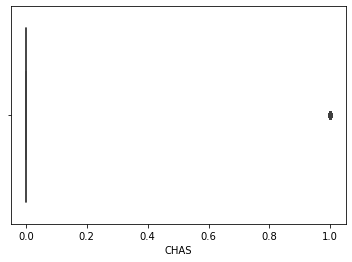

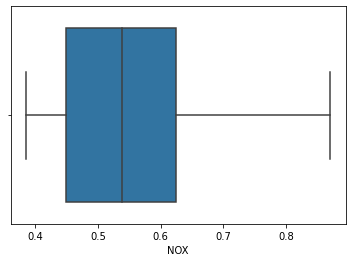

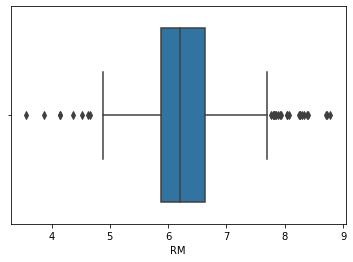

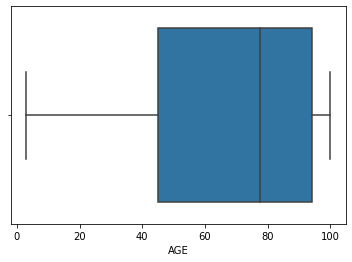

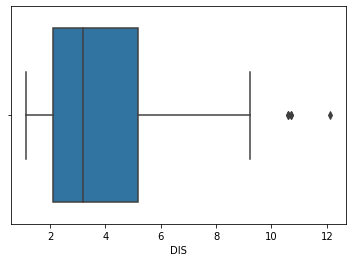

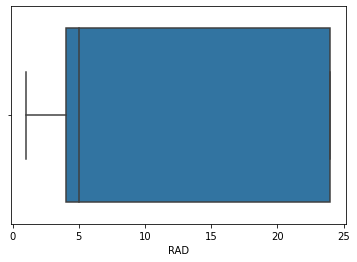

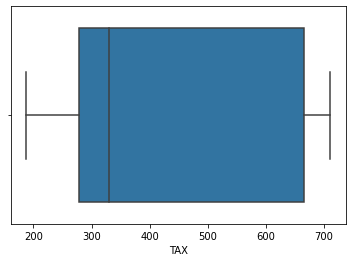

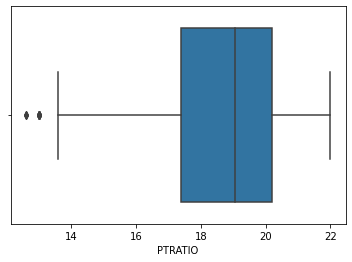

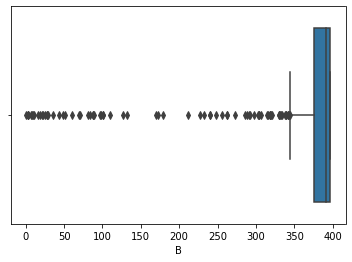

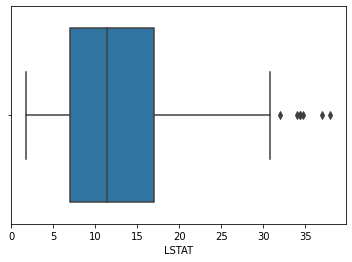

In [12]:
for cl in columns:
    fig = plt.figure()
    sns.boxplot(data=df,x=cl)

<AxesSubplot:xlabel='MEDV'>

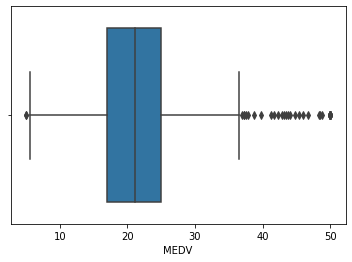

In [13]:
sns.boxplot(data=df,x="MEDV")

In [34]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [65]:
def find_outlire(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    print(type(x))
    print(x.index)
    print(q1)
    print(q3)
    print(iqr)
    print(q1-1.5*iqr)
    print(q3+1.5*iqr)

    outlr = df[(df.MEDV <(q1- 1.5*iqr)) | (df.MEDV > (q3+ 1.5*iqr))]
    print(type(outlr))
    return outlr

In [70]:
outlire = find_outlire(df.MEDV)
outlire.head(2)

<class 'pandas.core.series.Series'>
RangeIndex(start=0, stop=506, step=1)
17.025
25.0
7.975000000000001
5.0624999999999964
36.962500000000006
<class 'pandas.core.frame.DataFrame'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8


<AxesSubplot:>

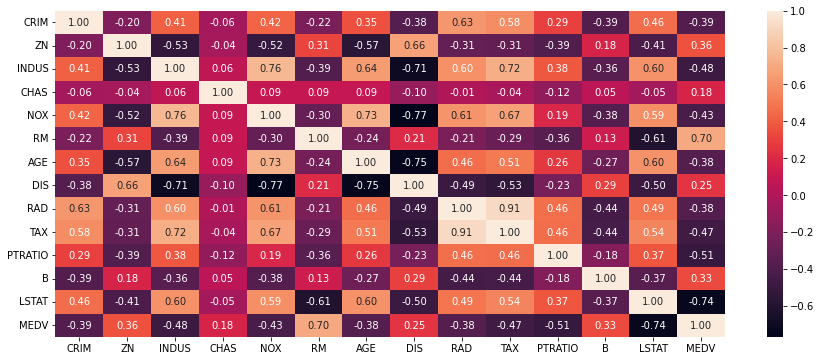

In [78]:
fig,ax = plt.subplots(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,ax=ax,fmt=".2f")

# observation
1. lstat and rm is more corelatted with medv
2. tax and rad are more corelatted with each oter

<AxesSubplot:xlabel='TAX', ylabel='MEDV'>

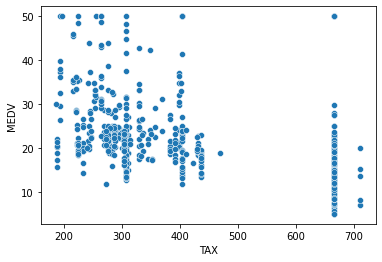

In [80]:
sns.scatterplot(data=df,x='TAX',y='MEDV')

<AxesSubplot:xlabel='RAD', ylabel='MEDV'>

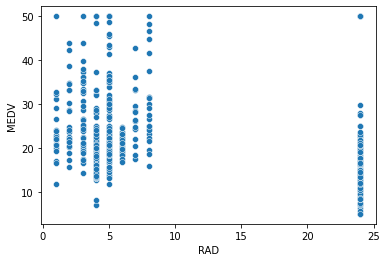

In [81]:
sns.scatterplot(data=df,x='RAD',y='MEDV')

<AxesSubplot:xlabel='RAD', ylabel='TAX'>

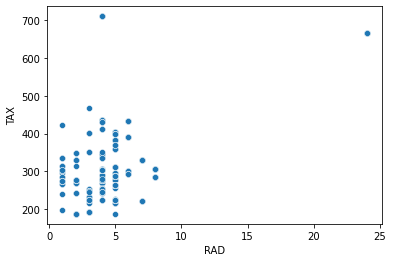

In [82]:
sns.scatterplot(data=df,x='RAD',y='TAX')

<AxesSubplot:xlabel='AGE', ylabel='MEDV'>

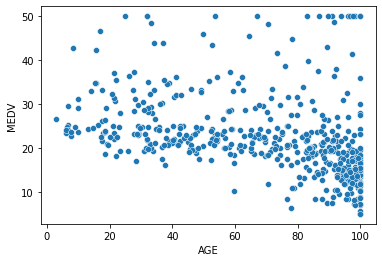

In [83]:
sns.scatterplot(data=df,x='AGE',y='MEDV')

/var/www/html/www/python/ai/venv10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

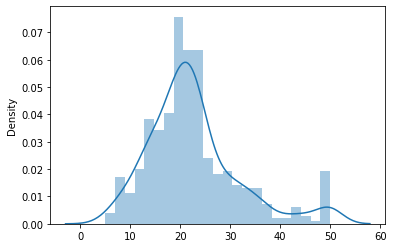

In [93]:
sns.distplot(x=df.MEDV)

# observation
1. maximum house price is 15 to 25 with outliers

In [94]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [98]:
for cl in df.columns:
    print(f"{cl}== {df[cl].unique()}")

CRIM== [6.32000e-03 2.73100e-02 2.72900e-02 3.23700e-02 6.90500e-02 2.98500e-02
 8.82900e-02 1.44550e-01 2.11240e-01 1.70040e-01 2.24890e-01 1.17470e-01
 9.37800e-02 6.29760e-01 6.37960e-01 6.27390e-01 1.05393e+00 7.84200e-01
 8.02710e-01 7.25800e-01 1.25179e+00 8.52040e-01 1.23247e+00 9.88430e-01
 7.50260e-01 8.40540e-01 6.71910e-01 9.55770e-01 7.72990e-01 1.00245e+00
 1.13081e+00 1.35472e+00 1.38799e+00 1.15172e+00 1.61282e+00 6.41700e-02
 9.74400e-02 8.01400e-02 1.75050e-01 2.76300e-02 3.35900e-02 1.27440e-01
 1.41500e-01 1.59360e-01 1.22690e-01 1.71420e-01 1.88360e-01 2.29270e-01
 2.53870e-01 2.19770e-01 8.87300e-02 4.33700e-02 5.36000e-02 4.98100e-02
 1.36000e-02 1.31100e-02 2.05500e-02 1.43200e-02 1.54450e-01 1.03280e-01
 1.49320e-01 1.71710e-01 1.10270e-01 1.26500e-01 1.95100e-02 3.58400e-02
 4.37900e-02 5.78900e-02 1.35540e-01 1.28160e-01 8.82600e-02 1.58760e-01
 9.16400e-02 1.95390e-01 7.89600e-02 9.51200e-02 1.01530e-01 8.70700e-02
 5.64600e-02 8.38700e-02 4.11300e-02 4.46200

# observation
RAD, CHAS are age are category column

In [ ]:
# LSTAT and RM relation with MEDV
#https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=88e011f75aae909fef8b7a380fbb2c85df5b3e66&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f73616865656c61686d6564322f426f73746f6e2d486f7573696e672d4544412f383865303131663735616165393039666566386237613338306662623263383564663562336536362f426f73746f6e253230486f7573696e672e6970796e62&logged_in=false&nwo=saheelahmed2%2FBoston-Housing-EDA&path=Boston+Housing.ipynb&platform=android&repository_id=137881439&repository_type=Repository&version=98
#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

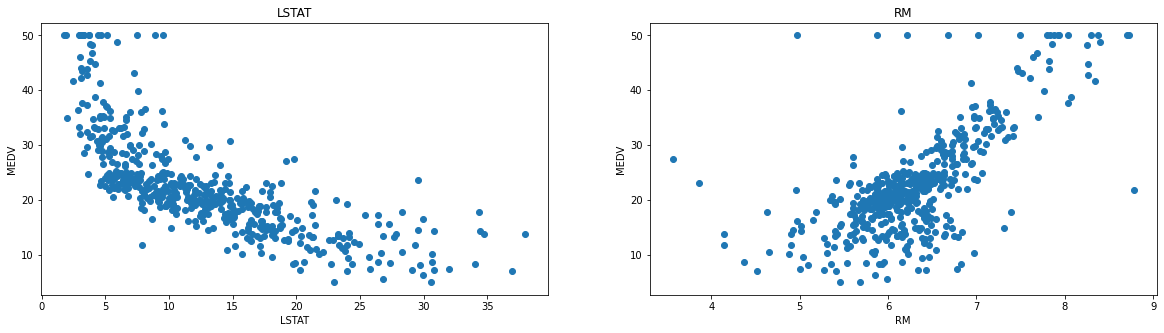

In [100]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# observation
1. average number of rooms increase price increase
2. lower status of the population decrease the price but not straightforward

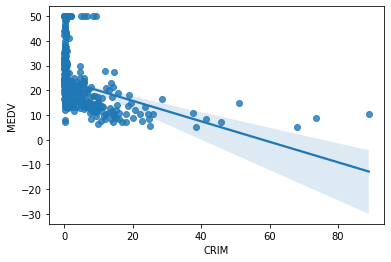

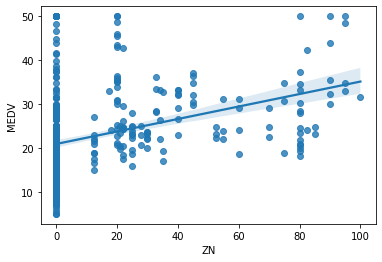

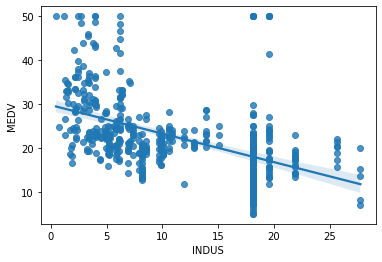

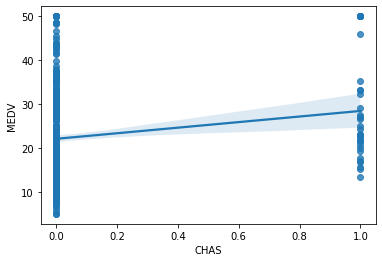

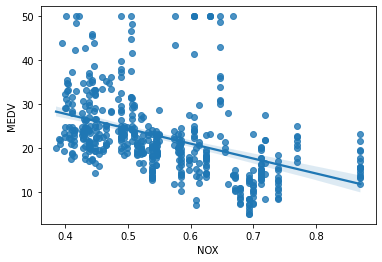

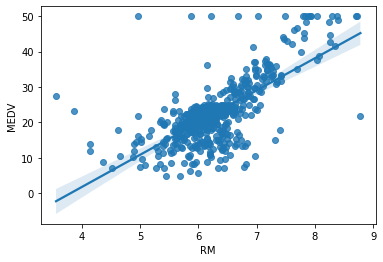

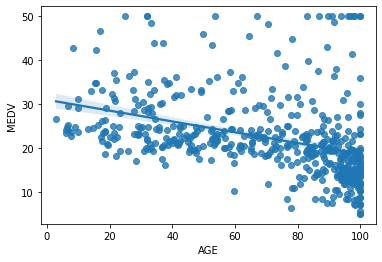

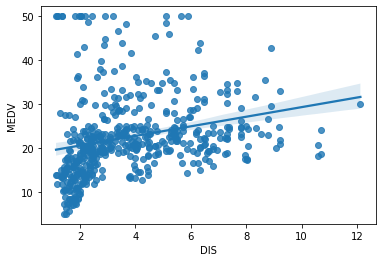

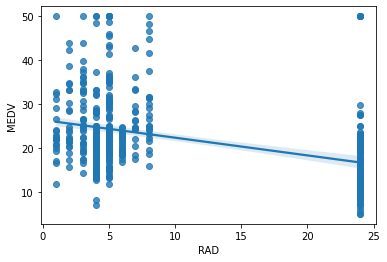

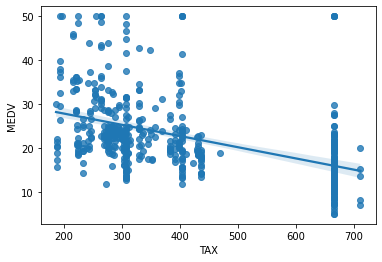

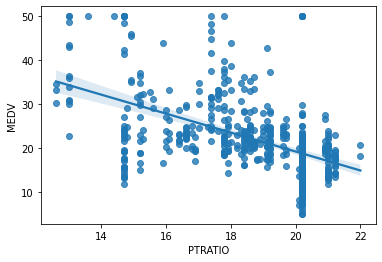

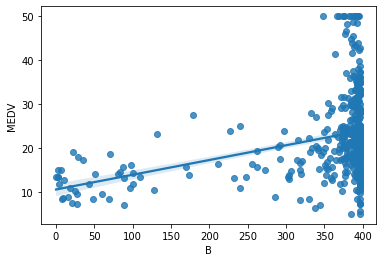

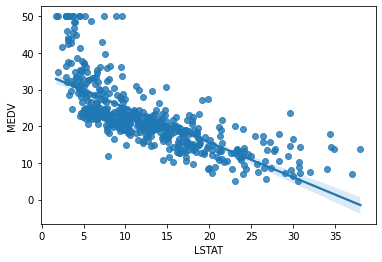

In [106]:
for cl in columns:
    fig = plt.subplots()
    sns.regplot(x=cl,y="MEDV", data=df, fit_reg=True)

In [107]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


<AxesSubplot:xlabel='AGE', ylabel='Count'>

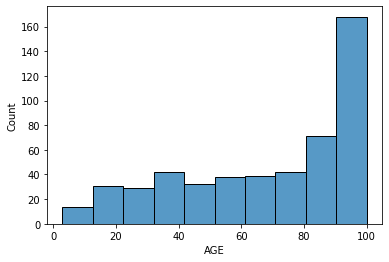

In [108]:
sns.histplot(data=df,x='AGE')

In [111]:
df['age_cat'] = 0
df.loc[ df['AGE'] <= 20, 'age_cat'] = 0
df.loc[(df['AGE'] > 20) & (df['AGE'] <= 40), 'age_cat'] = 1
df.loc[(df['AGE'] > 40) & (df['AGE'] <= 60), 'age_cat'] = 2
df.loc[(df['AGE'] > 60) & (df['AGE'] <= 80), 'age_cat'] = 3
df.loc[df['AGE'] > 80, 'age_cat'] = 4
df['age_cat'] = df['age_cat'].astype(int)

In [112]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,age_cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0,3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6,3


<AxesSubplot:xlabel='age_cat', ylabel='count'>

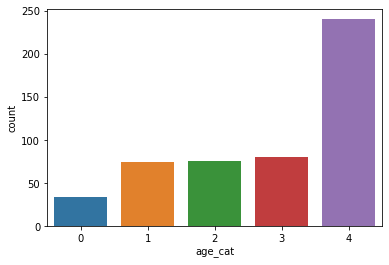

In [118]:
sns.countplot(x='age_cat', data=df)

In [126]:
trans_col = ["CRIM","ZN","INDUS","NOX","RM","DIS","TAX","PTRATIO","B","LSTAT"]
sel_col = df[trans_col]

In [128]:
# Create a scaler object 
scaler = StandardScaler()
scaler.fit(sel_col)
inputs_scaled =  pd.DataFrame(scaler.transform(sel_col), columns=trans_col)

In [130]:
inputs_scaled['age_cat'] = df['age_cat']
inputs_scaled['CHAS']= df['CHAS']
inputs_scaled['RAD'] = df['RAD']
inputs_scaled.head(2)

,CRIM,ZN,INDUS,NOX,RM,DIS,TAX,PTRATIO,B,LSTAT,age_cat,CHAS,RAD
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,0.140214,-0.666608,-1.459000,0.441052,-1.075562,3,0.0,1.0
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.557160,-0.987329,-0.303094,0.441052,-0.492439,3,0.0,2.0


In [132]:
X = inputs_scaled.copy()
y = df['MEDV']

In [134]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0)

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [137]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [141]:
prediction = rf.predict(x_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)
acc_randforest = round(rf.score(x_train, y_train) * 100, 2)
print(acc_randforest)

21.56889026091429
4.64423193444452
93.64


In [147]:
# Feature importance
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
RM,0.302
LSTAT,0.222
INDUS,0.090
PTRATIO,0.088
CRIM,0.069
NOX,0.065
DIS,0.055
TAX,0.042
B,0.023


In [152]:
newtrans_col = ["CRIM","ZN","INDUS","NOX","RM","DIS","TAX","PTRATIO","B","LSTAT"]
nwsel_col = df[newtrans_col]
x_train, x_test, y_train, y_test = train_test_split(
    nwsel_col, y, test_size=0.33, random_state=0)

In [153]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18)
rf.fit(x_train, y_train)
prediction = rf.predict(x_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)
acc_randforest = round(rf.score(x_train, y_train) * 100, 2)
print(acc_randforest)

20.00881321420999
4.473121193776219
94.48


accuracy increase after feature selection 93.64 to 94.48

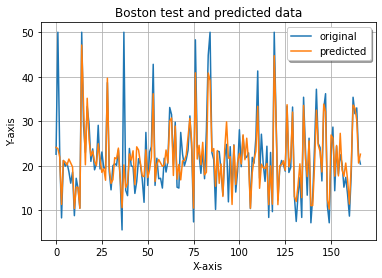

In [158]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, prediction, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [169]:
len(list(np.array(y_test)))

167

In [170]:
len(list(prediction))

167

In [176]:
# ORginal and predection difference
pddiff = pd.DataFrame({
    "y_test":np.array(y_test),
    "prediction":prediction
})
pddiff.head(15)

,y_test,prediction
0,22.6,24.155297
1,50.0,23.842968
2,23.0,21.958847
3,8.3,11.340709
4,21.2,21.173998
5,19.9,20.834097
6,20.6,20.170665
7,18.7,21.520071
8,16.1,20.622433
9,18.6,19.746753
